In [10]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('groupon.csv')
df.head()

,deal_id,start_date,min_req,treatment,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,fb_likes,quantity_sold,revenue
0,heli-flights,9/23/2011,10,1,4,99,51,185,1,1,290,540,53460
1,gl-champion-series-tennis-electric-factory,9/23/2011,20,1,2,95,41,9,0,1,43,190,18050
2,realm-of-terror-horror-experience,9/23/2011,50,1,3,25,50,38,0,1,208,380,9500
3,newport-gourmet,9/23/2011,15,1,3,50,50,369,0,1,16,90,4500
4,the-clayroom,9/23/2011,20,1,4,25,52,185,0,1,85,580,14500


In [3]:
df.shape

(710, 13)

In [4]:
df.drop(columns=['start_date', 'fb_likes', 'quantity_sold'], inplace=True)
df.drop(columns=['min_req'], inplace=True)
df.rename(columns={'treatment': 'has_MR'}, inplace=True)

In [5]:
df.head()

,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue
0,heli-flights,1,4,99,51,185,1,1,53460
1,gl-champion-series-tennis-electric-factory,1,2,95,41,9,0,1,18050
2,realm-of-terror-horror-experience,1,3,25,50,38,0,1,9500
3,newport-gourmet,1,3,50,50,369,0,1,4500
4,the-clayroom,1,4,25,52,185,0,1,14500


In [6]:
df.has_MR.value_counts()

has_MR
0    494
1    216
Name: count, dtype: int64

In [12]:
df.columns

Index(['deal_id', 'has_MR', 'prom_length', 'price', 'discount_pct',
       'coupon_duration', 'featured', 'limited_supply', 'revenue'],
      dtype='object')

In [ ]:
# Create a new column 'log_revenue' that is the log of the 'revenue' column
df['log_revenue'] = np.log(df['revenue'])

# Display the first few rows of the dataframe to verify the new column
df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue,ps,ps_logit,revenue_scaled,matched,ps_quintile,log_revenue
0,heli-flights,1,4,99,51,185,1,1,53460,0.259179,-1.050241,2.363169,348.0,2,10.886689
1,gl-champion-series-tennis-electric-factory,1,2,95,41,9,0,1,18050,0.230236,-1.206977,0.408823,403.0,2,9.800901
2,realm-of-terror-horror-experience,1,3,25,50,38,0,1,9500,0.288411,-0.903115,-0.063068,512.0,3,9.159047
3,newport-gourmet,1,3,50,50,369,0,1,4500,0.511772,0.047096,-0.339027,679.0,5,8.411833
4,the-clayroom,1,4,25,52,185,0,1,14500,0.325204,-0.729956,0.212892,690.0,3,9.581904


In [69]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the revenue column
df['revenue_scaled'] = scaler.fit_transform(df[['revenue']])

# Display the dataframe with the standardized revenue column
df.head()

,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue,ps,ps_logit,revenue_scaled
0,heli-flights,1,4,99,51,185,1,1,53460,0.259179,-1.050241,2.363169
1,gl-champion-series-tennis-electric-factory,1,2,95,41,9,0,1,18050,0.230236,-1.206977,0.408823
2,realm-of-terror-horror-experience,1,3,25,50,38,0,1,9500,0.288411,-0.903115,-0.063068
3,newport-gourmet,1,3,50,50,369,0,1,4500,0.511772,0.047096,-0.339027
4,the-clayroom,1,4,25,52,185,0,1,14500,0.325204,-0.729956,0.212892


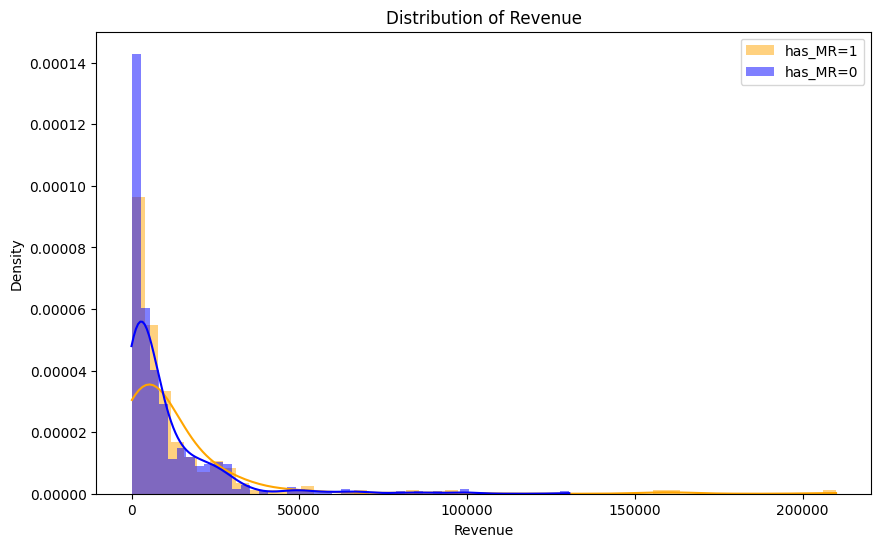

In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df.has_MR==1]['revenue'], color='orange', label='has_MR=1', kde=True, stat="density", linewidth=0)
sns.histplot(df[df.has_MR==0]['revenue'], color='blue', label='has_MR=0', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

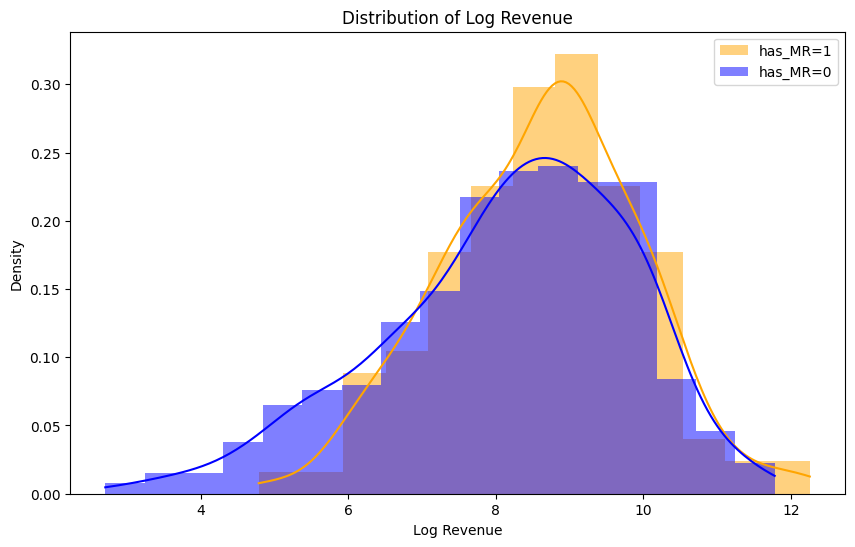

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df.has_MR==1]['log_revenue'], color='orange', label='has_MR=1', kde=True, stat="density", linewidth=0)
sns.histplot(df[df.has_MR==0]['log_revenue'], color='blue', label='has_MR=0', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Log Revenue')
plt.xlabel('Log Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

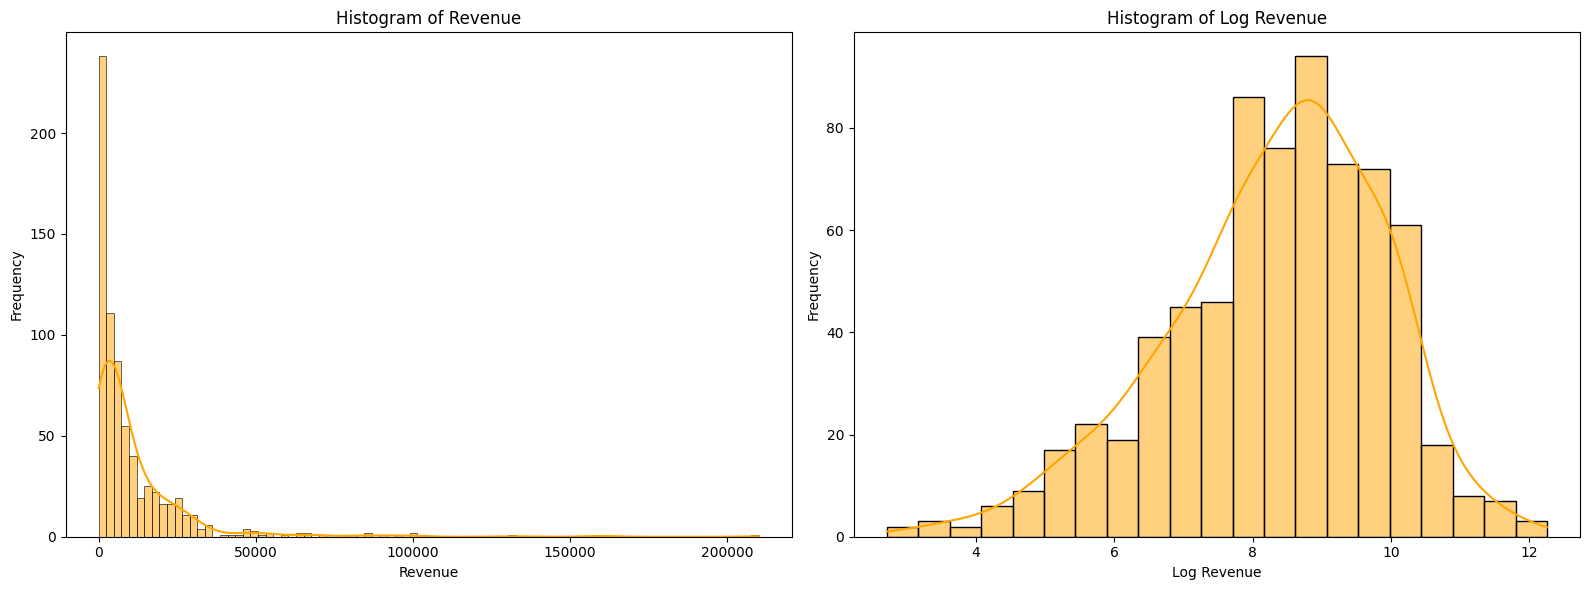

In [165]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the histogram of revenue
sns.histplot(df['revenue'], ax=axes[0], kde=True, color='orange')
axes[0].set_title('Histogram of Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# Plot the histogram of log_revenue
sns.histplot(df['log_revenue'], ax=axes[1], kde=True, color='orange')
axes[1].set_title('Histogram of Log Revenue')
axes[1].set_xlabel('Log Revenue')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Causal Analysis

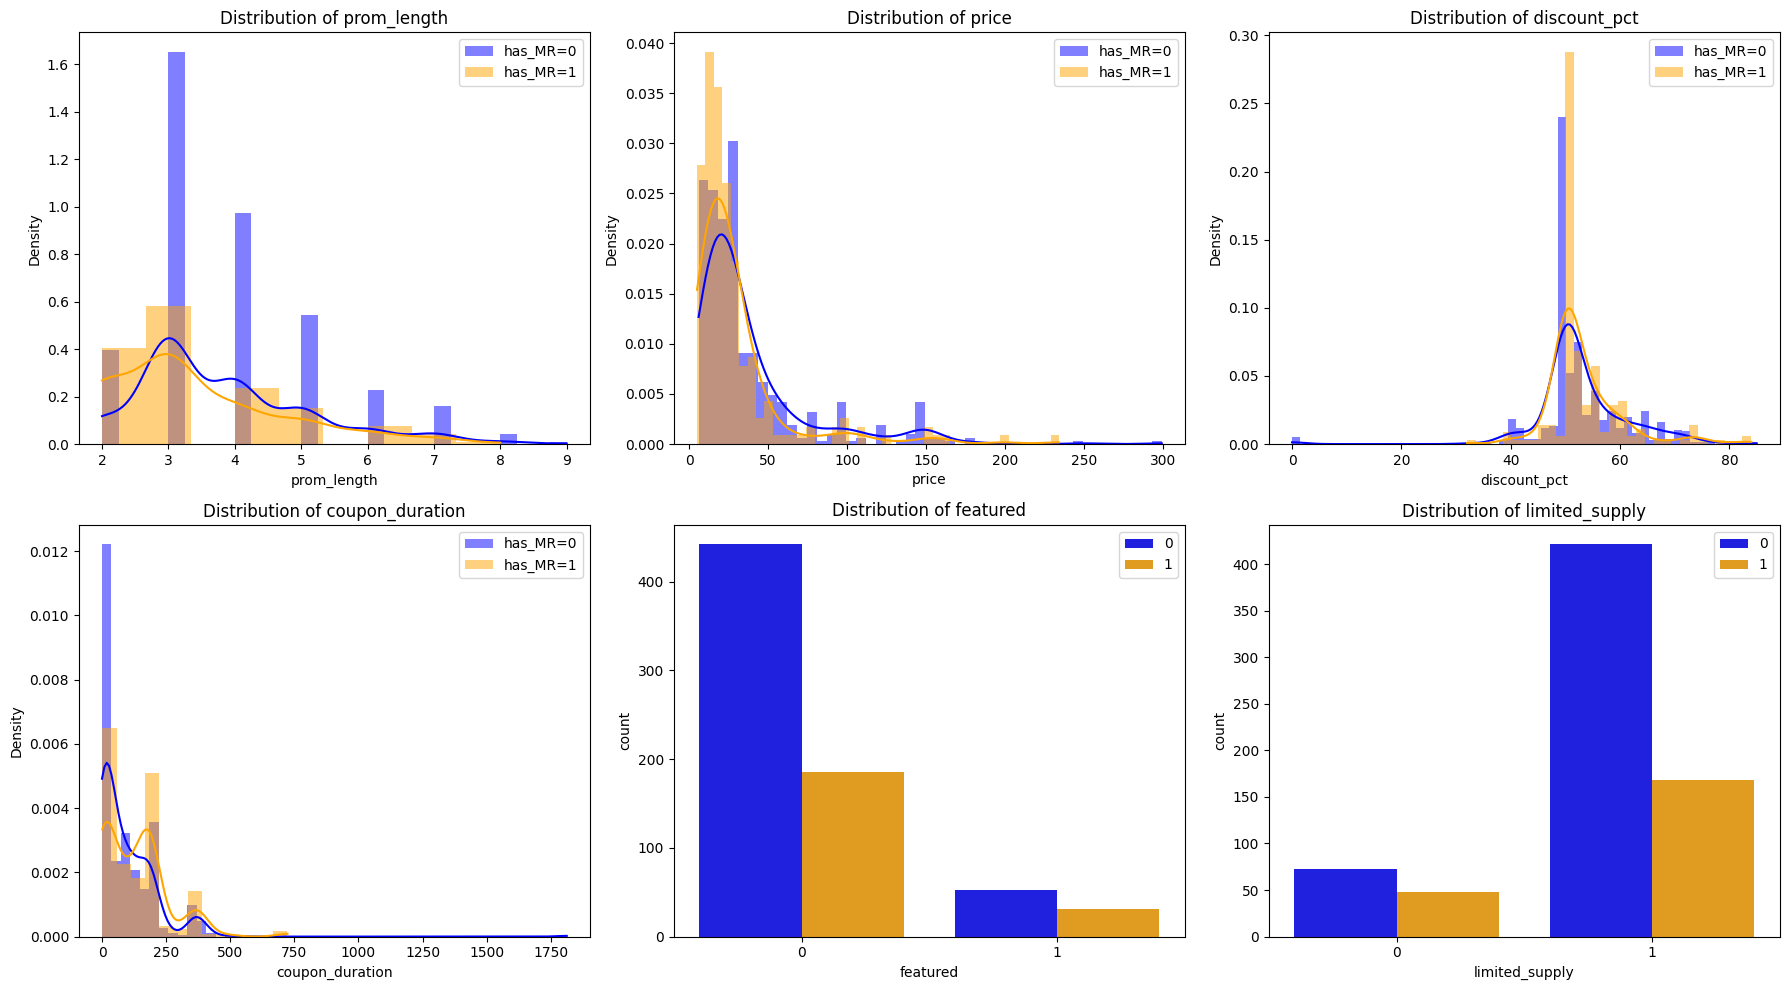

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distributions
for i, column in enumerate(columns_to_plot):
    if i<=3:
        sns.histplot(df[df.has_MR==0][column], ax=axes[i], color='blue', label='has_MR=0', kde=True, stat="density", linewidth=0)
        sns.histplot(df[df.has_MR==1][column], ax=axes[i], color='orange', label='has_MR=1', kde=True, stat="density", linewidth=0)
    else:
        sns.countplot(data=df, x=column, ax=axes[i], hue='has_MR', palette={0: 'blue', 1: 'orange'})
    axes[i].set_title(f'Distribution of {column}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [101]:
from scipy.stats import ttest_ind

# Define the covariate columns
covariate_columns = ['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']

# Initialize a list to store the results
t_test_results = []

# Conduct the t-test for each covariate
for column in covariate_columns:
    t_stat, p_value = ttest_ind(df[df.has_MR == 1][column], df[df.has_MR == 0][column])
    t_test_results.append({'Covariate': column, 'p-value': p_value})

# Convert the results to a DataFrame for better visualization
t_test_results_df = pd.DataFrame(t_test_results)

# Calculate the normalized difference for each covariate
for column in covariate_columns:
    mean_treatment = df[df.has_MR == 1][column].mean()
    mean_control = df[df.has_MR == 0][column].mean()
    std_treatment = df[df.has_MR == 1][column].std()
    std_control = df[df.has_MR == 0][column].std()
    norm_diff = (mean_treatment - mean_control) / np.sqrt((std_treatment**2 + std_control**2) / 2)
    t_test_results_df.loc[t_test_results_df['Covariate'] == column, 'Normalized Difference'] = norm_diff

# Display the updated results
t_test_results_df

,Covariate,p-value,Normalized Difference
0,prom_length,0.000063,-0.328324
1,price,0.004315,-0.240651
2,discount_pct,0.664344,0.036996
3,coupon_duration,0.000571,0.282704
4,featured,0.144802,0.115908
5,limited_supply,0.015178,-0.192279


## Regression Outcome

### Multicollinearity

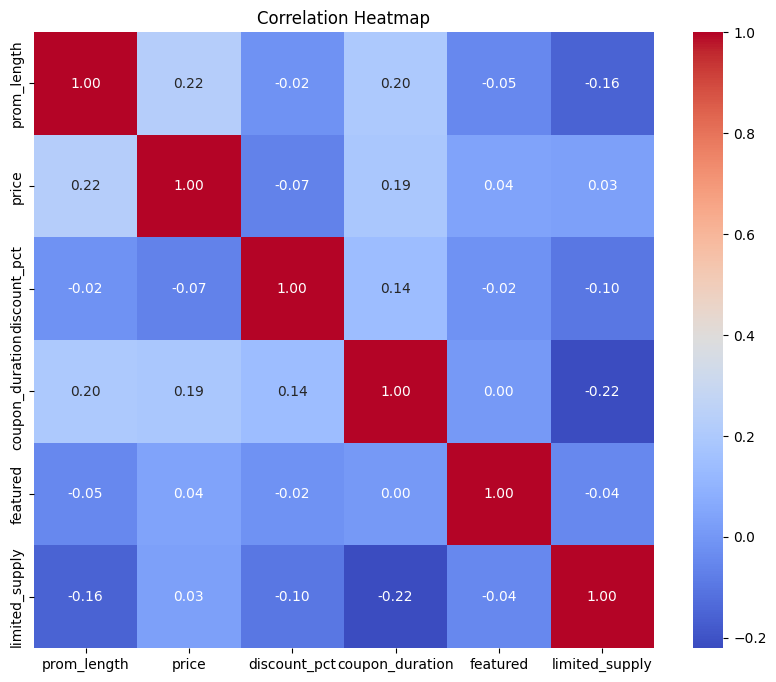

In [15]:
# Calculate the correlation matrix
corr = df[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the features for VIF calculation
features = df[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']]

# Add a constant column for the intercept
features = sm.add_constant(features)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Drop the constant column from the result
vif = vif.drop(vif[vif['Feature'] == 'const'].index)

print(vif)

           Feature       VIF
1      prom_length  1.107833
2            price  1.098237
3     discount_pct  1.035317
4  coupon_duration  1.136021
5         featured  1.008481
6   limited_supply  1.084998


### Fit Regression

In [176]:
df[df.log_revenue<=0]

,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue,ps,ps_logit,revenue_scaled,matched,ps_quintile,log_revenue
509,gl-spiegelworld-new-york,0,9,49,45,33,0,0,0,0.063506,-2.691008,-0.587391,NaN,1,-inf
547,gl-zarkana-cirque-du-soleil-new-york-2,0,5,54,49,36,0,1,0,0.140853,-1.808222,-0.587391,NaN,1,-inf


In [177]:
df.loc[df.log_revenue<=0, 'log_revenue'] = 0

In [179]:
import statsmodels.formula.api as smf

# Create the formula for the linear regression model
formula = 'log_revenue ~ has_MR + prom_length + price + discount_pct + coupon_duration + featured + limited_supply'
# formula = 'revenue ~ has_MR : prom_length : price : discount_pct : coupon_duration : featured : limited_supply'

# Fit the linear regression model
model = smf.ols(formula=formula, data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     29.71
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           5.07e-36
Time:                        01:20:41   Log-Likelihood:                -1264.2
No. Observations:                 710   AIC:                             2544.
Df Residuals:                     702   BIC:                             2581.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.0141      0.439     

In [180]:
# Number of bootstrap iterations
n_bootstrap = 1000

# List to store bootstrap ATEs
bootstrap_ates = []

# Function to calculate ATE using regression
def calculate_ate_regression(df):
    # Fit the regression model
    formula = 'log_revenue ~ has_MR + prom_length + price + discount_pct + coupon_duration + featured + limited_supply'
    model = smf.ols(formula=formula, data=df).fit()
    # Return the coefficient for has_MR (ATE)
    return model.params['has_MR']

# Bootstrap loop
for i in range(n_bootstrap):
    # Resample the dataset with replacement
    bootstrap_sample = df.sample(frac=1, replace=True)
    # Calculate ATE for the bootstrap sample
    bootstrap_ate = calculate_ate_regression(bootstrap_sample)
    bootstrap_ates.append(bootstrap_ate)

# Calculate the bootstrap standard error
bootstrap_se = np.std(bootstrap_ates)

# Print the results
print("Bootstrap Standard Error (SE) of has_MR (ATE):", bootstrap_se)

Bootstrap Standard Error (SE) of has_MR (ATE): 0.10877794831999182


In [181]:
# Create the formula for the linear regression model
# formula = 'revenue_scaled ~ has_MR + prom_length + price + discount_pct + coupon_duration + featured + limited_supply'
formula = 'log_revenue ~ has_MR * prom_length * price * discount_pct * coupon_duration * featured * limited_supply'

# Fit the linear regression model
model = smf.ols(formula=formula, data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3.296
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           6.17e-21
Time:                        01:21:50   Log-Likelihood:                -1184.0
No. Observations:                 710   AIC:                             2596.
Df Residuals:                     596   BIC:                             3116.
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [182]:
model.pvalues[model.pvalues<0.05].sort_values()

prom_length:price                                                0.001974
prom_length:price:limited_supply                                 0.002256
prom_length:price:discount_pct:limited_supply                    0.002301
prom_length:price:discount_pct                                   0.002366
price                                                            0.009895
price:discount_pct                                               0.010786
price:discount_pct:limited_supply                                0.010839
price:limited_supply                                             0.011975
prom_length:price:coupon_duration                                0.023786
prom_length:price:coupon_duration:limited_supply                 0.031351
prom_length:price:discount_pct:coupon_duration                   0.032095
prom_length:price:discount_pct:coupon_duration:limited_supply    0.036727
dtype: float64

In [183]:
import statsmodels.formula.api as smf

# Create the formula for the linear regression model
formula = 'log_revenue ~ has_MR + prom_length + price + discount_pct + coupon_duration + featured + limited_supply + prom_length:price + price:discount_pct + price:limited_supply'
# formula = 'revenue ~ has_MR : prom_length : price : discount_pct : coupon_duration : featured : limited_supply'

# Fit the linear regression model
model = smf.ols(formula=formula, data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     21.87
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.04e-35
Time:                        01:24:07   Log-Likelihood:                -1259.7
No. Observations:                 710   AIC:                             2541.
Df Residuals:                     699   BIC:                             2592.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9065 

## Propensity Score Methods

### Calculate Propensity Score

In [32]:
X = df[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']]
y = df['has_MR']

# use logistic regression to calculate the propensity scores
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

# prediction
pred_binary = lr.predict(X)  # binary 0 control, 1, treatment
pred_prob = lr.predict_proba(X)  # probabilities for classes

print('the binary prediction is:', pred_binary[0])
print('the corresponding probabilities are:', pred_prob[0])

# the propensity score (ps) is the probability of being 1 (i.e., in the treatment group)
df['ps'] = pred_prob[:, 1]

# calculate the logit of the propensity score for matching if needed
# I just use the propensity score to match in this tutorial
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

df['ps_logit'] = df.ps.apply(lambda x: logit(x))

df.head()

the binary prediction is: 0
the corresponding probabilities are: [0.74082121 0.25917879]


,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue,ps,ps_logit
0,heli-flights,1,4,99,51,185,1,1,53460,0.259179,-1.050241
1,gl-champion-series-tennis-electric-factory,1,2,95,41,9,0,1,18050,0.230236,-1.206977
2,realm-of-terror-horror-experience,1,3,25,50,38,0,1,9500,0.288411,-0.903115
3,newport-gourmet,1,3,50,50,369,0,1,4500,0.511772,0.047096
4,the-clayroom,1,4,25,52,185,0,1,14500,0.325204,-0.729956


<Axes: xlabel='ps', ylabel='Count'>

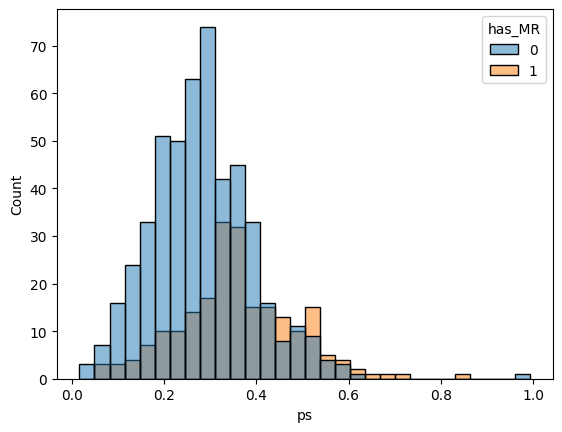

In [33]:
sns.histplot(data=df, x='ps', hue='has_MR')  # multiple="dodge" for 

### Assess Overlap

In [40]:
df[df.has_MR==1].ps_logit.min(), df[df.has_MR==1].ps_logit.max()

(-2.6555458818256317, 1.6814733433294258)

In [42]:
df[df.has_MR==0].ps_logit.min(), df[df.has_MR==0].ps_logit.max()

(-4.071177709164253, 5.101934420324444)

In [53]:
# Filter treatment and control groups
treatment_group = df[df.has_MR == 1]
control_group = df[df.has_MR == 0]

# Initialize a counter for matches
match_count = 0
unmatched_treatment_obs = []

# Iterate over each observation in the treatment group
for _, treatment_row in treatment_group.iterrows():
    # Check if there is any match in the control group within the specified range
    if any(abs(treatment_row['ps_logit'] - control_group['ps_logit']) <= 0.1):
        match_count += 1
    else:
        unmatched_treatment_obs.append(treatment_row)

print(f'Number of observations in treatment group with matches in control group within 0.1 ps_logit difference: {match_count}')

Number of observations in treatment group with matches in control group within 0.1 ps_logit difference: 212


In [59]:
unmatched_treatment_id = [deal['deal_id'] for deal in unmatched_treatment_obs]
unmatched_treatment_id

['chicago-chocolate-tour',
 'gl-ticketcity-legends-classic-nyc',
 'melrose-park-indoor-grand-prix-1-chicago',
 'chicago-photo-safaris-3']

In [55]:
# Filter treatment and control groups
treatment_group = df[df.has_MR == 1]
control_group = df[df.has_MR == 0]

# Initialize a counter for matches
match_count = 0
unmatched_control_obs = []

# Iterate over each observation in the treatment group
for _, control_row in control_group.iterrows():
    # Check if there is any match in the control group within the specified range
    if any(abs(control_row['ps_logit'] - treatment_group['ps_logit']) <= 0.1):
        match_count += 1
    else:
        unmatched_control_obs.append(control_row)


print(f'Number of observations in control group with matches in treatment group within 0.1 ps_logit difference: {match_count}')

Number of observations in control group with matches in treatment group within 0.1 ps_logit difference: 487


In [60]:
unmatched_control_id = [deal['deal_id'] for deal in unmatched_control_obs]
unmatched_control_id

['air-ventures-new-york-1',
 'berry-dive-center-1',
 'dc-bth-boobs-and-tubes-new-york',
 'dc-out-boating-in-boston',
 'monkey-zone',
 's-s-badger',
 'world-domination-events']

In [61]:
df[df.deal_id.isin(unmatched_treatment_id + unmatched_control_id)]

,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue,ps,ps_logit
34,chicago-chocolate-tour,1,2,22,45,369,1,1,22000,0.723834,0.963560
99,gl-ticketcity-legends-classic-nyc,1,2,17,51,371,0,1,1360,0.658855,0.658196
162,melrose-park-indoor-grand-prix-1-chicago,1,3,25,73,720,0,0,25000,0.843100,1.681473
168,chicago-photo-safaris-3,1,3,59,50,386,1,0,35400,0.669060,0.703937
223,air-ventures-new-york-1,0,7,299,46,205,0,0,8970,0.026979,-3.585337
231,berry-dive-center-1,0,6,157,50,92,0,1,9420,0.055585,-2.832646
289,dc-bth-boobs-and-tubes-new-york,0,7,119,51,6,0,0,1190,0.058497,-2.778494
302,dc-out-boating-in-boston,0,7,249,38,31,0,1,14940,0.016771,-4.071178
598,monkey-zone,0,4,10,55,1812,0,1,4100,0.993952,5.101934
646,s-s-badger,0,6,149,54,74,0,1,1490,0.054218,-2.858995


### IPWT 
stabilized estimator v.s. non-stabilized estimator

In [185]:
# stabilized estimator (weighted Hayek estimator)

df1_test = df.copy()
df1_test['inv_propensity_score'] = 1/df1_test['ps']
df1_test['inv_one_minus_propensity_score'] = 1/(1-df1_test['ps'])
df1_test['Y_weighted_1'] = df1_test['log_revenue'] * df1_test['inv_propensity_score']
df1_test['Y_weighted_0'] = df1_test['log_revenue'] * df1_test['inv_one_minus_propensity_score']

df1_test[df1_test.has_MR==1].Y_weighted_1.sum() / df1_test[df1_test.has_MR==1].inv_propensity_score.sum() - df1_test[df1_test.has_MR==0].Y_weighted_0.sum() / df1_test[df1_test.has_MR==0].inv_one_minus_propensity_score.sum()



In [189]:
# bootstrap SE
def bootstrap_se(data, n_bootstrap):
    n = data.shape[0]
    bootstrap_estimates = []
    for i in range(n_bootstrap):
        sample = data.sample(n, replace=True)
        estimate = sample[sample.has_MR==1].Y_weighted_1.sum() / sample[sample.has_MR==1].inv_propensity_score.sum() - sample[sample.has_MR==0].Y_weighted_0.sum() / sample[sample.has_MR==0].inv_one_minus_propensity_score.sum()
        bootstrap_estimates.append(estimate)
    return np.std(bootstrap_estimates)

se_stabilized= bootstrap_se(df1_test, 1000)
se_stabilized

In [194]:
df.drop(columns=['matched']).to_csv('groupon.dat', sep='\t', index=False)

In [195]:
0.5629 - 1.96*0.1076, 0.5629 + 1.96*0.1076

### 1on1 Matching
conducted in R

### PS-Strata

In [196]:
# Assign each observation to a quintile based on the propensity score
df['ps_quintile'] = pd.qcut(df['ps'], q=5, labels=False) + 1

# Display the dataframe with the new quintile column
df.head()

,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue,ps,ps_logit,revenue_scaled,matched,ps_quintile,log_revenue
0,heli-flights,1,4,99,51,185,1,1,53460,0.259179,-1.050241,2.363169,348.0,2,10.886689
1,gl-champion-series-tennis-electric-factory,1,2,95,41,9,0,1,18050,0.230236,-1.206977,0.408823,403.0,2,9.800901
2,realm-of-terror-horror-experience,1,3,25,50,38,0,1,9500,0.288411,-0.903115,-0.063068,512.0,3,9.159047
3,newport-gourmet,1,3,50,50,369,0,1,4500,0.511772,0.047096,-0.339027,679.0,5,8.411833
4,the-clayroom,1,4,25,52,185,0,1,14500,0.325204,-0.729956,0.212892,690.0,3,9.581904


In [148]:
df[df.ps_quintile==1].has_MR.value_counts(), df[df.ps_quintile==2].has_MR.value_counts(), df[df.ps_quintile==3].has_MR.value_counts(), df[df.ps_quintile==4].has_MR.value_counts(), df[df.ps_quintile==5].has_MR.value_counts()

(has_MR
 0    117
 1     25
 Name: count, dtype: int64,
 has_MR
 0    119
 1     23
 Name: count, dtype: int64,
 has_MR
 0    106
 1     36
 Name: count, dtype: int64,
 has_MR
 0    85
 1    57
 Name: count, dtype: int64,
 has_MR
 1    75
 0    67
 Name: count, dtype: int64)

In [124]:
from scipy.stats import ttest_ind

# Initialize a list to store the results
results = []

# Iterate over each quintile
for quintile in df['ps_quintile'].unique():
    # Filter the dataframe for the current quintile
    df_quintile = df[df['ps_quintile'] == quintile]
    
    # Iterate over each covariate
    for covariate in covariate_columns:
        # Conduct the t-test
        t_stat, p_value = ttest_ind(df_quintile[df_quintile['has_MR'] == 1][covariate], 
                                    df_quintile[df_quintile['has_MR'] == 0][covariate])
        
        # Calculate the normalized difference
        mean_treatment = df_quintile[df_quintile['has_MR'] == 1][covariate].mean()
        mean_control = df_quintile[df_quintile['has_MR'] == 0][covariate].mean()
        std_treatment = df_quintile[df_quintile['has_MR'] == 1][covariate].std()
        std_control = df_quintile[df_quintile['has_MR'] == 0][covariate].std()
        norm_diff = (mean_treatment - mean_control) / np.sqrt((std_treatment**2 + std_control**2) / 2)
        
        # Append the results to the list
        results.append({
            'Quintile': quintile,
            'Covariate': covariate,
            'p-value': p_value,
            'Normalized Difference': norm_diff
        })

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
results_df.pivot(index='Quintile', columns='Covariate', values=['p-value', 'Normalized Difference']).T

Quintile                                      1         2         3         4  \
                      Covariate                                                 
p-value               coupon_duration  0.737697  0.176734  0.078678  0.015663   
                      discount_pct     0.390969  0.101832  0.713292  0.740856   
                      featured         0.001128  0.000516  0.918095  0.189083   
                      limited_supply   0.585239  0.815821  0.879889  0.493322   
                      price            0.628189  0.032444  0.358847  0.072100   
                      prom_length      0.549823  0.637526  0.514215  0.085726   
Normalized Difference coupon_duration  0.071251  0.310643  0.322411 -0.432687   
                      discount_pct     0.173922 -0.381682  0.080207 -0.058543   
                      featured         0.510140  0.543914  0.019721 -0.231771   
                      limited_supply  -0.114970 -0.050527 -0.028802 -0.116093   
                      price           -0.106543  0.400917  0.150834 -0.328564   
                      prom_length      0.133349  0.099136  0.115011 -0.296301   

Quintile                                      5  
                      Covariate                  
p-value               coupon_duration  0.581405  
                      discount_pct     0.683493  
                      featured         0.078898  
                      limited_supply   0.099463  
                      price            0.027962  
                      prom_length      0.754772  
Normalized Difference coupon_duration  0.091561  
                      discount_pct     0.067878  
                      featured        -0.295944  
                      limited_supply   0.278709  
                      price           -0.366918  
                      prom_length     -0.052933

In [127]:
# Calculate the interval for each ps quintile
ps_intervals = df.groupby('ps_quintile')['ps'].agg(['min', 'max']).reset_index()

# Display the intervals
ps_intervals

,ps_quintile,min,max
0,1,0.016771,0.202716
1,2,0.203277,0.273449
2,3,0.273587,0.329193
3,4,0.329225,0.392194
4,5,0.392426,0.993952


In [197]:
# Dummy encode the ps_quintile column
df_encoded = pd.get_dummies(df, columns=['ps_quintile'], prefix='q')

# Display the first few rows of the encoded dataframe
df_encoded.head()

,deal_id,has_MR,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,revenue,ps,ps_logit,revenue_scaled,matched,log_revenue,q_1,q_2,q_3,q_4,q_5
0,heli-flights,1,4,99,51,185,1,1,53460,0.259179,-1.050241,2.363169,348.0,10.886689,False,True,False,False,False
1,gl-champion-series-tennis-electric-factory,1,2,95,41,9,0,1,18050,0.230236,-1.206977,0.408823,403.0,9.800901,False,True,False,False,False
2,realm-of-terror-horror-experience,1,3,25,50,38,0,1,9500,0.288411,-0.903115,-0.063068,512.0,9.159047,False,False,True,False,False
3,newport-gourmet,1,3,50,50,369,0,1,4500,0.511772,0.047096,-0.339027,679.0,8.411833,False,False,False,False,True
4,the-clayroom,1,4,25,52,185,0,1,14500,0.325204,-0.729956,0.212892,690.0,9.581904,False,False,True,False,False


In [198]:
# Create the formula for the linear regression model
formula = 'log_revenue ~ q_2 + q_3 + q_4 + q_5 + has_MR + q_2:has_MR + q_3:has_MR + q_4:has_MR + q_5:has_MR'

# Fit the linear regression model
model = smf.ols(formula=formula, data=df_encoded).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     5.078
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.15e-06
Time:                        01:33:33   Log-Likelihood:                -1333.8
No. Observations:                 710   AIC:                             2688.
Df Residuals:                     700   BIC:                             2733.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5645      0

In [199]:
0.6276 + 1/5*(0.2981+0.0192-0.3450-0.3239)

In [131]:
df['ps_quintile'].value_counts()

ps_quintile
2    142
3    142
5    142
4    142
1    142
Name: count, dtype: int64

In [200]:
# Function to calculate the principal stratification estimator (ATE)
def calculate_ate(data):
    formula = 'log_revenue ~ q_2 + q_3 + q_4 + q_5 + has_MR + q_2:has_MR + q_3:has_MR + q_4:has_MR + q_5:has_MR'
    model = smf.ols(formula=formula, data=data).fit()
    # Extract the coefficient(s) of interest (e.g., "has_MR")
    ate = model.params['has_MR']
    return ate

# Function to perform bootstrap
def bootstrap_se(data, num_bootstrap_samples=1000):
    bootstrap_estimates = []

    for _ in range(num_bootstrap_samples):
        # Resample the data with replacement
        bootstrap_sample = data.sample(frac=1, replace=True)
        
        # Calculate the ATE for the bootstrap sample
        ate = calculate_ate(bootstrap_sample)
        
        # Store the estimate
        bootstrap_estimates.append(ate)

    # Calculate the standard error of the bootstrap estimates
    se = np.std(bootstrap_estimates, ddof=1)  # ddof=1 for sample standard deviation

    return se, bootstrap_estimates

# Example usage
# Assume df_encoded is your DataFrame containing the necessary data
# Replace df_encoded with your actual DataFrame name

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Calculate bootstrap SE
bootstrap_se_value, bootstrap_estimates = bootstrap_se(df_encoded, num_bootstrap_samples=num_bootstrap_samples)

print(f"Bootstrap Standard Error: {bootstrap_se_value}")

Bootstrap Standard Error: 0.3571249478703708


### Double Robust Estimator

In [206]:
df.ps_logit.describe()

count    710.000000
mean      -0.898028
std        0.674289
min       -4.071178
25%       -1.271114
50%       -0.880707
75%       -0.540232
max        5.101934
Name: ps_logit, dtype: float64

In [207]:
df_trimmed = df[df.ps_logit.between(-2.6555, 1.6815)]

In [208]:
df_trimmed.has_MR.value_counts()

has_MR
0    485
1    215
Name: count, dtype: int64

#### Not trimmed

In [202]:
import statsmodels.api as sm

# Assuming df is your DataFrame

# Step 1: Extract variables
Y = df['log_revenue']
T = df['has_MR']
X = df[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']]
ps = df['ps']  # Propensity scores

# Add intercept to covariates
X_with_intercept = sm.add_constant(X)

# Step 2: Estimate Outcome Models
# Treated group
model_treated = sm.OLS(Y[T == 1], X_with_intercept[T == 1]).fit()
m1_X = model_treated.predict(X_with_intercept)

# Control group
model_control = sm.OLS(Y[T == 0], X_with_intercept[T == 0]).fit()
m0_X = model_control.predict(X_with_intercept)

# Step 3: Compute the Double Robust Estimator components
dr_component = m1_X - m0_X + (T * (Y - m1_X) / ps) - ((1 - T) * (Y - m0_X) / (1 - ps))

# Compute the ATE
ATE_DR = dr_component.mean()

print("Double Robust ATE:", ATE_DR)

Double Robust ATE: 1.5642185683431835


In [203]:
# Step 4: Estimate Standard Error via Bootstrap (as shown in the previous explanation)
# Step 3: Calculate the Standard Error using Bootstrap
n_bootstrap = 1000
np.random.seed(0)  # For reproducibility
bootstrap_ates = []

for _ in range(n_bootstrap):
    # Bootstrap resampling
    bootstrap_indices = np.random.choice(df.index, size=len(df), replace=True)
    df_bootstrap = df.loc[bootstrap_indices]

    # Re-extract variables
    Y_boot = df_bootstrap['log_revenue']
    T_boot = df_bootstrap['has_MR']
    X_boot = df_bootstrap[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']]
    ps_boot = df_bootstrap['ps']

    # Outcome models
    X_boot_with_intercept = sm.add_constant(X_boot)
    model_treated_boot = sm.OLS(Y_boot[T_boot == 1], X_boot_with_intercept[T_boot == 1]).fit()
    model_control_boot = sm.OLS(Y_boot[T_boot == 0], X_boot_with_intercept[T_boot == 0]).fit()
    Y1_pred_boot = model_treated_boot.predict(X_boot_with_intercept)
    Y0_pred_boot = model_control_boot.predict(X_boot_with_intercept)

    # DR components
    m1_X_boot = Y1_pred_boot
    m0_X_boot = Y0_pred_boot
    dr_components_boot = m1_X_boot - m0_X_boot + \
        (T_boot * (Y_boot - m1_X_boot) / ps_boot) - ((1 - T_boot) * (Y_boot - m0_X_boot) / (1 - ps_boot))

    # ATE for bootstrap sample
    ATE_DR_boot = dr_components_boot.mean()
    bootstrap_ates.append(ATE_DR_boot)

# Calculate standard error
ATE_DR_se = np.std(bootstrap_ates)

print("Standard Error of Double Robust ATE:", ATE_DR_se)


Standard Error of Double Robust ATE: 0.6712819555804036


#### trimmed

In [209]:
import statsmodels.api as sm

# Assuming df is your DataFrame

# Step 1: Extract variables
Y = df_trimmed['log_revenue']
T = df_trimmed['has_MR']
X = df_trimmed[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']]
ps = df_trimmed['ps']  # Propensity scores

# Add intercept to covariates
X_with_intercept = sm.add_constant(X)

# Step 2: Estimate Outcome Models
# Treated group
model_treated = sm.OLS(Y[T == 1], X_with_intercept[T == 1]).fit()
m1_X = model_treated.predict(X_with_intercept)

# Control group
model_control = sm.OLS(Y[T == 0], X_with_intercept[T == 0]).fit()
m0_X = model_control.predict(X_with_intercept)

# Step 3: Compute the Double Robust Estimator components
dr_component = m1_X - m0_X + (T * (Y - m1_X) / ps) - ((1 - T) * (Y - m0_X) / (1 - ps))

# Compute the ATE
ATE_DR = dr_component.mean()

print("Double Robust ATE:", ATE_DR)

Double Robust ATE: 0.47815546021397265


In [210]:
# Step 4: Estimate Standard Error via Bootstrap (as shown in the previous explanation)
# Step 3: Calculate the Standard Error using Bootstrap
n_bootstrap = 1000
np.random.seed(0)  # For reproducibility
bootstrap_ates = []

for _ in range(n_bootstrap):
    # Bootstrap resampling
    bootstrap_indices = np.random.choice(df_trimmed.index, size=len(df), replace=True)
    df_bootstrap = df_trimmed.loc[bootstrap_indices]

    # Re-extract variables
    Y_boot = df_bootstrap['log_revenue']
    T_boot = df_bootstrap['has_MR']
    X_boot = df_bootstrap[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']]
    ps_boot = df_bootstrap['ps']

    # Outcome models
    X_boot_with_intercept = sm.add_constant(X_boot)
    model_treated_boot = sm.OLS(Y_boot[T_boot == 1], X_boot_with_intercept[T_boot == 1]).fit()
    model_control_boot = sm.OLS(Y_boot[T_boot == 0], X_boot_with_intercept[T_boot == 0]).fit()
    Y1_pred_boot = model_treated_boot.predict(X_boot_with_intercept)
    Y0_pred_boot = model_control_boot.predict(X_boot_with_intercept)

    # DR components
    m1_X_boot = Y1_pred_boot
    m0_X_boot = Y0_pred_boot
    dr_components_boot = m1_X_boot - m0_X_boot + \
        (T_boot * (Y_boot - m1_X_boot) / ps_boot) - ((1 - T_boot) * (Y_boot - m0_X_boot) / (1 - ps_boot))

    # ATE for bootstrap sample
    ATE_DR_boot = dr_components_boot.mean()
    bootstrap_ates.append(ATE_DR_boot)

# Calculate standard error
ATE_DR_se = np.std(bootstrap_ates)

print("Standard Error of Double Robust ATE:", ATE_DR_se)


Standard Error of Double Robust ATE: 0.10831352850263484


# Sensitivity analysis

In [ ]:
! pip install dowhy

In [213]:
import dowhy
from dowhy import CausalModel

In [214]:
treatment = 'has_MR'
outcome = 'log_revenue'
covariates = ['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']

In [219]:
model = CausalModel(
    data=df_trimmed,
    treatment=treatment,
    outcome=outcome)

In [220]:
identified_estimand = model.identify_effect()

estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1
)

print("Estimated Average Treatment Effect (ATE):", estimate.value)

Estimated Average Treatment Effect (ATE): 0.4604648903126254


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [221]:
def sensitivity_analysis(model, identified_estimand, estimate, strengths):
    results = []
    for strength in strengths:
        refute = model.refute_estimate(
            identified_estimand,
            estimate,
            method_name="add_unobserved_common_cause",
            confounder_effect_on_treatment="binary_flip",
            confounder_effect_on_outcome="linear",
            effect_strength_on_treatment=strength,
            effect_strength_on_outcome=strength
        )
        results.append({
            'strength': strength,
            'refuted_estimate': refute.new_effect
        })
    return pd.DataFrame(results)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys

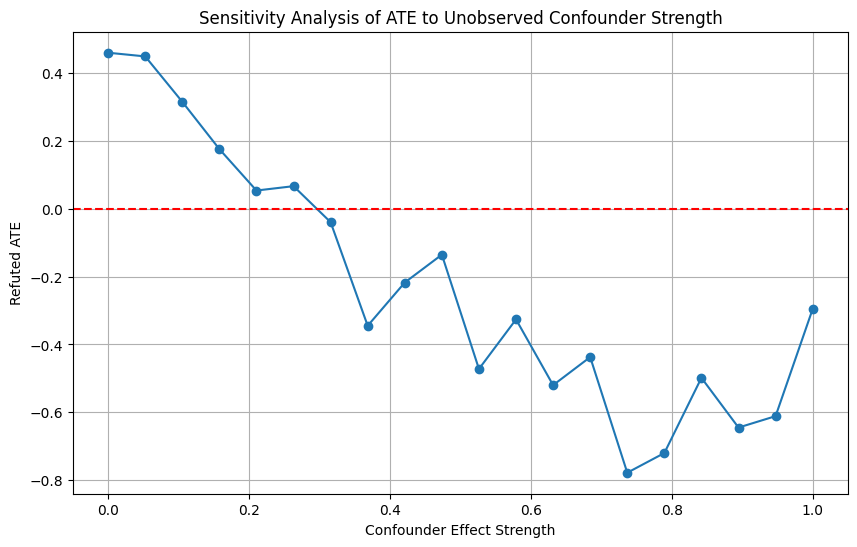

In [222]:
strengths = np.linspace(0, 1, 20)  # Define a range of strengths from 0 to 1
sensitivity_results = sensitivity_analysis(model, identified_estimand, estimate, strengths)

plt.figure(figsize=(10, 6))
plt.plot(sensitivity_results['strength'], sensitivity_results['refuted_estimate'], marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Sensitivity Analysis of ATE to Unobserved Confounder Strength')
plt.xlabel('Confounder Effect Strength')
plt.ylabel('Refuted ATE')
plt.grid(True)
plt.show()
